In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
def u(x,a,s):
    if a == 0:
        return (1/6*s)*x + 0.5
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(-3*s))/(b(3*s)-b(-3*s))
    
def us(x_list, a, s): #utility function for the list of values           
    return [u(x, a, s) for x in x_list]

In [3]:
u_list = np.random.normal(0,1,1000)

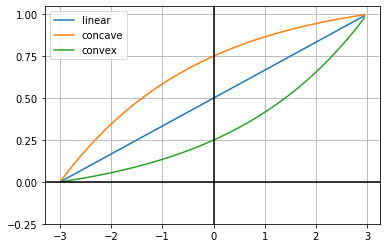

In [4]:
X = np.arange(-3,3,0.05)
Y1 = [u(x,0.367,1) for x in X]
Y2 = [u(x,-0.367,1) for x in X]
Y3 = [u(x,0,1) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.plot(X,Y1, label='concave') 
plt.plot(X,Y2, label='convex') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

## Optimality gap, combined

In [21]:
def cal_opt(m, mu=0, s=1, t=1, a=0):
    out_d = {}
    
    dt = [] #list to store true decision
    d_e = [] #list to store index of maximum estimates
    d_pr = [] #list to store index of maximum posterior right way
    d_pw = [] #list to store index of maximum posterior wrong way
    
    
    o_e = [] #list to store optimality gap in estimates
    o_pr = [] #list to store og in posterior right way
    o_pw = [] # list to store og in posterior wrong way
    
    for i in range(10000):
        #Generate $m$ true values $x_j$ from the prior
        x = np.random.normal(mu,s,m) #x_j~N(0,1)
        u_x = us(x, a, s)
        
        #index of the right decision
        max_ux = max(u_x)
        max_ix = u_x.index(max_ux) #index of true maximum
        dt.append(max_ix) 

        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.normal(x_j,t,1)[0] for x_j in x] #y_j~N(x_j,1)
        u_y = us(y, a, s)
        
        max_uy = max(u_y) #maximum estimates
        max_j = u_y.index(max_uy) #index of maximum estimates
        d_e.append(max_j) 
        
        #Otimality gap estimates 
        d = (max(u_x) - u(x[max_j], a, s))/max(u_x)
        o_e.append(d)
        
        
        #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
        x_p = []
        for y_j in y:
            p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*y_j
            p_std = (s**2*t**2/(s**2 + t**2)) #caution! it is variance

            x_p.append(list(np.random.normal(p_mean, np.sqrt(p_std),1000)))


        #Compute $u(x_jk$) for all $j,k$
        u_x_p = [us(x, a, s) for x in x_p]

        #Compute the average $\sum_{k=1}^1000 u_(x_jk)$ to get an estimate for the expected utility $E[u(X_j)|Y_j=y_j]$
        eu = [np.mean(x) for x in u_x_p]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j2 = eu.index(max_eu)
        d_pr.append(max_j2)     

        #posterior disappointment 
        d = (max(u_x) - u(x[max_j2], a, s))/max(u_x)
        o_pr.append(d)
        
        
        #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
        x_p = []
        for y_j in y:
            p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*y_j
            x_p.append(p_mean)

        eu = [u(x,a,s) for x in x_p]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j3 = eu.index(max_eu)
        d_pw.append(max_j3)

        #posterior disappointment 
        d = (max(u_x) - u_x[max_j3])/max(u_x) 
        o_pw.append(d)
        
    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    
    out_d["dt"] = dt
    out_d["d_e"] = d_e
    out_d["d_pr"] = d_pr
    out_d["d_pw"] = d_pw
    
    out_d["o_e"] = o_e
    out_d["o_pr"] = o_pr
    out_d["o_pw"] = o_pw
    
    print("Number of different decision between true & estimated")
    print(Counter((np.array(dt)-np.array(d_e))))
    print()
    print("Number of different decision between true & posterior right way")
    print(Counter((np.array(dt)-np.array(d_pr))))
    print()
    print("Number of different decision between true & posterior wrong way")
    print(Counter((np.array(dt)-np.array(d_pw))))

    print("Mean of relative optimality gap between true & estimated")
    print(np.mean(o_e))
    print()
    print("Mean of relative optimality gap between true & posterior right way")
    print(np.mean((o_pr)))
    print()
    print("Mean of relative optimality gap between true & posterior wrong way")
    print(np.mean((o_pw)))
    return out_d

In [25]:
for m in [2,3,5,10]:
    print("m", m)
    cal_opt(m=m)
    print("")

m 2
Number of different decision between true & estimated
Counter({0: 7497, -1: 1282, 1: 1221})

Number of different decision between true & posterior right way
Counter({0: 7496, -1: 1279, 1: 1225})

Number of different decision between true & posterior wrong way
Counter({0: 7497, -1: 1282, 1: 1221})
Mean of relative optimality gap between true & estimated
0.04919167796943347

Mean of relative optimality gap between true & posterior right way
0.04931890565948069

Mean of relative optimality gap between true & posterior wrong way
0.04919167796943347

m 3
Number of different decision between true & estimated
Counter({0: 6532, 1: 1167, -1: 1138, 2: 597, -2: 566})

Number of different decision between true & posterior right way
Counter({0: 6519, 1: 1185, -1: 1138, 2: 597, -2: 561})

Number of different decision between true & posterior wrong way
Counter({0: 6532, 1: 1167, -1: 1138, 2: 597, -2: 566})
Mean of relative optimality gap between true & estimated
0.06324855971697647

Mean of relat

# Optimality gap - multiattribute estimates

In [46]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    out_d = {}
    
    dt = [] #list to store true decision
    d_e = [] #list to store index of maximum estimates
    d_pr = [] #list to store index of maximum posterior right way
    d_pw = [] #list to store index of maximum posterior wrong way
    
    
    o_e = [] #list to store optimality gap in estimates
    o_pr = [] #list to store og in posterior right way
    o_pw = [] # list to store og in posterior wrong way
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    for k in range(1000):
        x = []
        eu = []
        eu_pr = []
        eu_pw = []

        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)           
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)
            
            u_x_jp_l_r = [] #list to store 1000 u(x) of posterior u of one mu alternative 
            u_x_jp_l_w = []
            
            x_jp_r = [] #one alternative, right way
            x_jp_w = [] #one alternative, wrong way
            
            for i in range(n): #loop for generating posterior mu for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 
                
                x_p_ji = list(np.random.normal(p_mean, np.sqrt(p_var),1000))
                
                #right way
                x_jp_r.append(np.mean(us(x_p_ji, a[i], 1)))
                #wrong way
                x_jp_w.append(np.mean(x_p_ji))

            #wrong way
            eu_pw.append(cal_u(x_jp_w)) #append u(x) of one posterior alternative (repeated 1000 times)            
            
            #right way
            eu_pr.append(np.dot(w, x_jp_r)) #append w_i*E[u(x)|y]
            
        #index of true max
        max_ix = x.index(max(x))
        dt.append(max_ix)
              
        ###Saving result from estimates
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)
        d_e.append(max_j)

        #disappointment 
        d = (max(x) - x[max_j])/max(x)
        o_e.append(d)
        
        ###Saving result from posterior right way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu_pr)
        max_j1 = eu_pr.index(max_eu)
        d_pr.append(max_j1)
        
        #disappointment 
        d2 = (max(x) - x[max_j1])/max(x)
        o_pr.append(d2)
        
        ###Saving result from posterior wrong way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu_pw)
        max_j2 = eu_pw.index(max_eu)
        d_pw.append(max_j2)

        #disappointment 
        d3 = (max(x) - x[max_j2])/max(x)
        o_pw.append(d3)       
        
    out_d["dt"] = dt
    out_d["d_e"] = d_e
    out_d["d_pr"] = d_pr
    out_d["d_pw"] = d_pw
    
    out_d["o_e"] = o_e
    out_d["o_pr"] = o_pr
    out_d["o_pw"] = o_pw
    
    
    print("Number of different decision between true & estimated")
    print(Counter((np.array(dt)-np.array(d_e))))
    print()
    print("Number of different decision between true & posterior right way")
    print(Counter((np.array(dt)-np.array(d_pr))))
    print()
    print("Number of different decision between true & posterior wrong way")
    print(Counter((np.array(dt)-np.array(d_pw))))
    print()
    print("Mean of relative optimality gap between true & estimated")
    print(np.mean(o_e))
    print()
    print("Mean of relative optimality gap between true & posterior right way")
    print(np.mean((o_pr)))
    print()
    print("Mean of relative optimality gap between true & posterior wrong way")
    print(np.mean((o_pw)))
        
        
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return out_d

In [47]:
for m in [2,3,5,10]:
    print("m", m)
    cal_post_mu(m=m) #Increasing number of alternative
    print()

m 2
Number of different decision between true & estimated
Counter({0: 734, -1: 133, 1: 133})

Number of different decision between true & posterior right way
Counter({0: 733, -1: 135, 1: 132})

Number of different decision between true & posterior wrong way
Counter({0: 733, -1: 135, 1: 132})

Mean of relative optimality gap between true & estimated
0.03264244454219876

Mean of relative optimality gap between true & posterior right way
0.032254961278099445

Mean of relative optimality gap between true & posterior wrong way
0.032254961278099445

m 3
Number of different decision between true & estimated
Counter({0: 652, 1: 124, -1: 114, 2: 55, -2: 55})

Number of different decision between true & posterior right way
Counter({0: 648, 1: 125, -1: 115, 2: 56, -2: 56})

Number of different decision between true & posterior wrong way
Counter({0: 648, 1: 125, -1: 115, 2: 56, -2: 56})

Mean of relative optimality gap between true & estimated
0.041059802640014395

Mean of relative optimality gap 

In [62]:
for t in [2,3,5,10]:
    print("t", t)
    cal_post_mu(m=5, t=[t]*5) #Increasing estimation uncertainity of one attribute
    print()

t 2
Number of different decision between true & estimated
Counter({0: 390, -1: 117, 1: 114, 2: 90, -2: 78, 3: 69, -3: 65, -4: 41, 4: 36})

Number of different decision between true & posterior right way
Counter({0: 391, 1: 117, -1: 116, 2: 88, -2: 79, 3: 66, -3: 61, -4: 43, 4: 39})

Number of different decision between true & posterior wrong way
Counter({0: 391, 1: 117, -1: 116, 2: 88, -2: 79, 3: 66, -3: 61, -4: 43, 4: 39})

Mean of relative optimality gap between true & estimated
0.0952471470900361

Mean of relative optimality gap between true & posterior right way
0.09648143633193762

Mean of relative optimality gap between true & posterior wrong way
0.09648143633193762

t 3
Number of different decision between true & estimated
Counter({0: 321, 1: 144, -1: 132, -2: 103, 2: 85, -3: 83, 3: 64, -4: 36, 4: 32})

Number of different decision between true & posterior right way
Counter({0: 323, 1: 140, -1: 128, -2: 105, 2: 90, -3: 85, 3: 63, -4: 35, 4: 31})

Number of different decision bet

In [61]:
for t in [2,3,5,10]:
    print("t", t)
    cal_post_mu(m=5, t=[1,1,t,1,1]) #Increasing estimation uncertainity of one attribute
    print()

t 2


KeyboardInterrupt: 

In [57]:
for t in [2,3,5,10]:
    print("t", t)
    cal_post_mu(m=5, t=[1,1,t,1,1], a=[0.367]*5) #Increasing estimation uncertainity of one attribute
    print()

t 2
Number of different decision between true & estimated
Counter({0: 440, 1: 102, -1: 98, -2: 96, 2: 91, -3: 67, 3: 66, 4: 22, -4: 18})

Number of different decision between true & posterior right way
Counter({0: 457, 1: 105, -1: 102, -2: 86, 2: 85, 3: 65, -3: 53, 4: 27, -4: 20})

Number of different decision between true & posterior wrong way
Counter({0: 459, 1: 105, -1: 102, -2: 86, 2: 85, 3: 64, -3: 52, 4: 27, -4: 20})

Mean of relative optimality gap between true & estimated
0.04473709439375403

Mean of relative optimality gap between true & posterior right way
0.04347116836025595

Mean of relative optimality gap between true & posterior wrong way
0.04319946363778672

t 3
Number of different decision between true & estimated
Counter({0: 416, -1: 128, 1: 113, 2: 88, -2: 82, 3: 62, -3: 55, -4: 30, 4: 26})

Number of different decision between true & posterior right way
Counter({0: 478, -1: 114, 1: 89, 2: 79, -2: 79, 3: 58, -3: 45, -4: 31, 4: 27})

Number of different decision betwee

In [58]:
for t in [2,3,5,10]:
    print("t", t)
    cal_post_mu(m=5, t=[1,1,t,1,1], a=[-0.367]*5) #Increasing estimation uncertainity of one attribute
    print()

t 2
Number of different decision between true & estimated
Counter({0: 435, 1: 126, -1: 103, 2: 87, -2: 69, 3: 65, -3: 60, -4: 30, 4: 25})

Number of different decision between true & posterior right way
Counter({0: 483, 1: 110, -1: 88, -2: 80, 3: 73, 2: 69, -3: 54, -4: 23, 4: 20})

Number of different decision between true & posterior wrong way
Counter({0: 480, 1: 110, -1: 87, -2: 82, 3: 73, 2: 68, -3: 55, -4: 24, 4: 21})

Mean of relative optimality gap between true & estimated
0.1331990388989055

Mean of relative optimality gap between true & posterior right way
0.11056304329474019

Mean of relative optimality gap between true & posterior wrong way
0.11228293257668913

t 3
Number of different decision between true & estimated
Counter({0: 357, -1: 143, 1: 115, 2: 101, -2: 86, -3: 68, 3: 65, -4: 34, 4: 31})

Number of different decision between true & posterior right way
Counter({0: 469, -1: 100, 1: 97, 2: 88, -2: 84, 3: 58, -3: 49, -4: 31, 4: 24})

Number of different decision between

In [59]:
for a in [-0.367, 0, 0.367]:
    print("a", a)
    cal_post_mu(m=5, t=[1,1,1,1,1], a=[a]*5) #Increasing estimation uncertainity of one attribute
    print()

a -0.367
Number of different decision between true & estimated
Counter({0: 508, -1: 104, 1: 86, -2: 81, 2: 78, 3: 50, -3: 47, 4: 24, -4: 22})

Number of different decision between true & posterior right way
Counter({0: 506, -1: 107, 1: 88, 2: 81, -2: 75, 3: 50, -3: 41, 4: 28, -4: 24})

Number of different decision between true & posterior wrong way
Counter({0: 505, -1: 106, 1: 89, 2: 82, -2: 76, 3: 49, -3: 41, 4: 28, -4: 24})

Mean of relative optimality gap between true & estimated
0.09209824075220852

Mean of relative optimality gap between true & posterior right way
0.09262652326883913

Mean of relative optimality gap between true & posterior wrong way
0.09285450149855609

a 0
Number of different decision between true & estimated
Counter({0: 548, 1: 107, -1: 82, -2: 75, 2: 68, -3: 43, 3: 36, 4: 24, -4: 17})

Number of different decision between true & posterior right way
Counter({0: 544, 1: 109, -1: 83, -2: 75, 2: 70, -3: 41, 3: 37, 4: 23, -4: 18})

Number of different decision betw

In [60]:
for a in [-0.367, 0, 0.367]:
    print("a", a)
    cal_post_mu(m=5, t=[1,1,5,1,1], a=[a]*5) #Increasing estimation uncertainity of one attribute
    print()

a -0.367
Number of different decision between true & estimated
Counter({0: 309, -1: 143, 1: 130, -2: 111, 2: 100, -3: 75, 3: 67, 4: 33, -4: 32})

Number of different decision between true & posterior right way
Counter({0: 482, 1: 113, -1: 109, -2: 80, 2: 77, -3: 55, 3: 39, 4: 23, -4: 22})

Number of different decision between true & posterior wrong way
Counter({0: 483, 1: 113, -1: 108, -2: 81, 2: 77, -3: 54, 3: 39, 4: 23, -4: 22})

Mean of relative optimality gap between true & estimated
0.20724551078273953

Mean of relative optimality gap between true & posterior right way
0.11209885435068338

Mean of relative optimality gap between true & posterior wrong way
0.11179296553631965

a 0
Number of different decision between true & estimated
Counter({0: 312, 1: 125, -2: 124, 2: 119, -1: 115, 3: 73, -3: 65, -4: 35, 4: 32})

Number of different decision between true & posterior right way
Counter({0: 443, -1: 108, 1: 107, 2: 89, -2: 81, -3: 60, 3: 53, 4: 32, -4: 27})

Number of different deci

In [147]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    for k in range(10000):
        x = []
        eu = []
        
        mx = []
        meu = []
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)           
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)
            uy_j = np.array([u(y_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(uy_j)
            
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_mu = (mx[max_j]-meu[max_j])/mx[max_j]
        d_list.append(d)
        d_mu_list.append(d_mu)
        
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, d_mu_list

## overall disappointment

Varying attribute-specific estimation uncertainty 

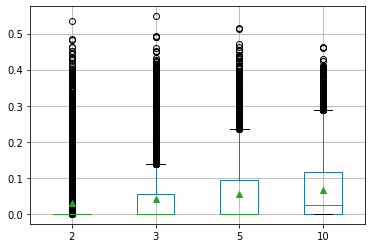

2     0.029430
3     0.042124
5     0.055018
10    0.065906
dtype: float64


In [108]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

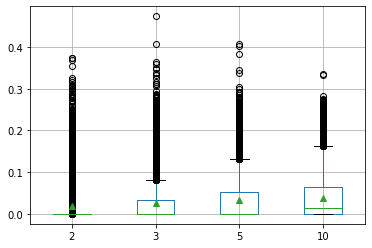

2     0.018505
3     0.025794
5     0.033191
10    0.038460
dtype: float64


In [109]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m,  a=[0.367]*n)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

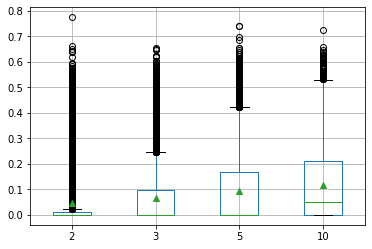

2     0.046689
3     0.067047
5     0.093742
10    0.116480
dtype: float64


In [110]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m,  a=[-0.367]*n)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

### modifying the estimation uncertainty

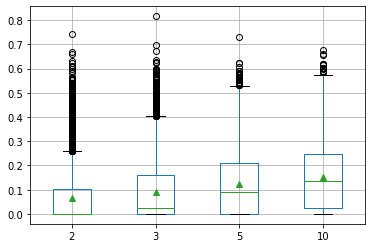

2     0.065400
3     0.092307
5     0.123205
10    0.152767
dtype: float64


In [148]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1])[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

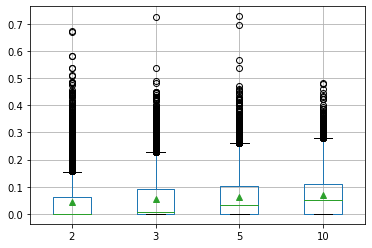

2     0.042955
3     0.054234
5     0.063084
10    0.068769
dtype: float64


In [149]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[0.367]*3)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

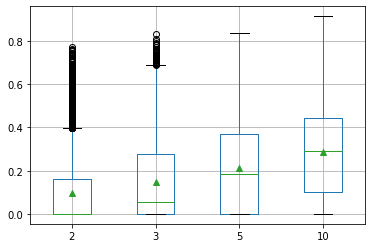

2     0.096298
3     0.149003
5     0.214506
10    0.286141
dtype: float64


In [150]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[-0.367]*n)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# Optimality gap posterior right way

In [162]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(1000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            
            u_x_jp_l = [] #list to store 1000 u(x) of posterior u of one mu alternative 
            for z in range(100):
                u_x_jp = [] #[u_1(x_j1), u_2(x_j2), ...]
                
                for i in range(n): #loop for generating posterior mu for one alternative
                    p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                    p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                    x_ji = np.random.normal(p_mean, np.sqrt(p_var),1)[0]
                    u_x_ji = u(x_ji, a[i], 1)
                    u_x_jp.append(u_x_ji)
                
                
                u_x_jp_l.append(u_x_jp) #append u_x_jp of one posterior alternative (repeated 1000 times)
            
            e = np.mean(u_x_jp_l, axis=0) # E[u(x)|y]           
            eu.append(np.dot(w, e)) #append w_i*E[u(x)|y]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


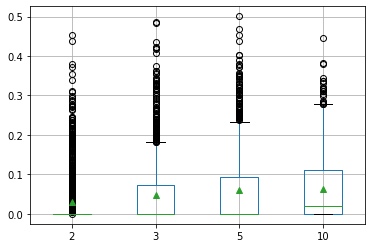

2     0.029251
3     0.048617
5     0.060281
10    0.063286
dtype: float64


In [163]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

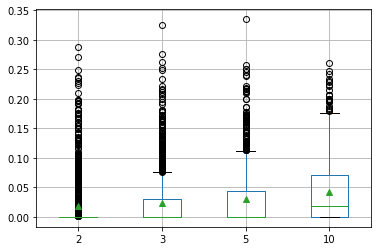

2     0.019081
3     0.024435
5     0.029953
10    0.041471
dtype: float64


In [164]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

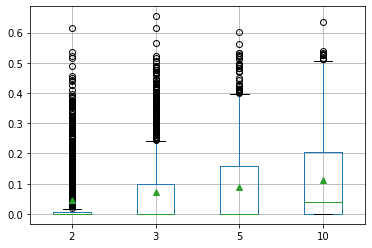

2     0.045535
3     0.072848
5     0.090183
10    0.113229
dtype: float64


In [165]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

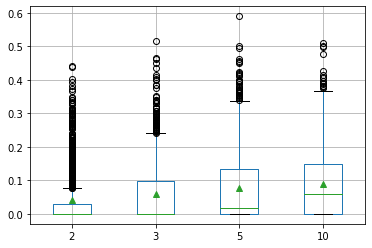

2     0.040381
3     0.058914
5     0.078402
10    0.089863
dtype: float64


In [166]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

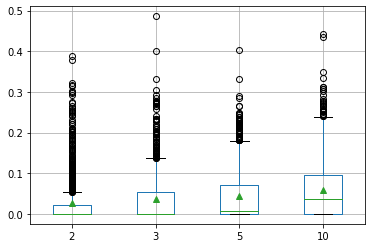

2     0.026540
3     0.036165
5     0.044253
10    0.058383
dtype: float64


In [167]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

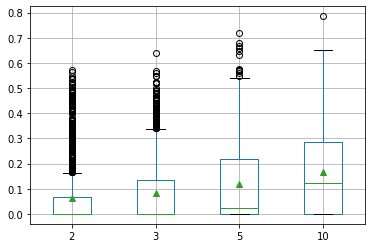

2     0.063778
3     0.082893
5     0.118522
10    0.166392
dtype: float64


In [168]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [137]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(1000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            
            u_x_jp_l = [] #list to store 1000 u(x) of posterior u of one mu alternative 
            for z in range(100):
                x_jp = []
                
                for i in range(n): #loop for generating posterior mu for one alternative
                    p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                    p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                    x_jp.append(np.random.normal(p_mean, np.sqrt(p_var),1)[0])
                
                u_x_jp = cal_u(x_jp)
                u_x_jp_l.append(u_x_jp) #append u(x) of one posterior alternative (repeated 1000 times)
            
            e = np.mean(u_x_jp_l) #compute the average of 1000 u(x)|y, which is E[u(x)|y]           
            eu.append(e) #append E[u(x)|y]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


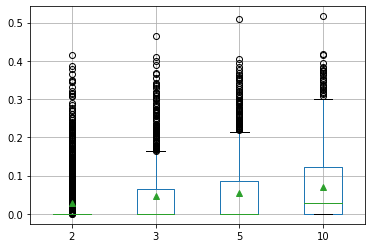

2     0.029281
3     0.046240
5     0.055512
10    0.071242
dtype: float64


In [138]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

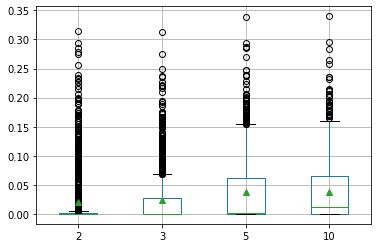

2     0.020261
3     0.024142
5     0.037716
10    0.038159
dtype: float64


In [139]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

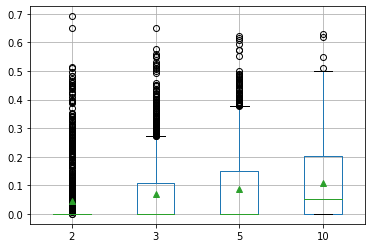

2     0.046645
3     0.071271
5     0.087394
10    0.108747
dtype: float64


In [140]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Increase the estimation uncertainty

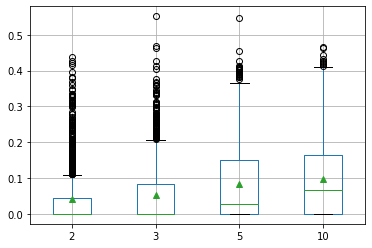

2     0.042046
3     0.052358
5     0.084104
10    0.097502
dtype: float64


In [144]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

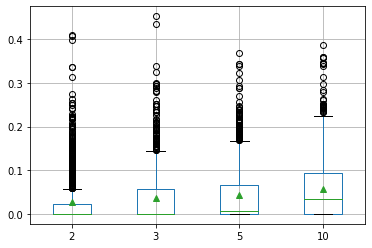

2     0.027593
3     0.037214
5     0.042657
10    0.057850
dtype: float64


In [145]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

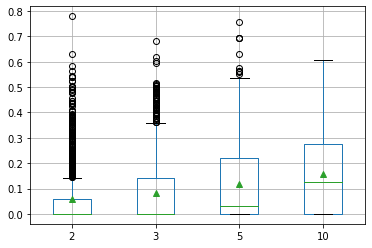

2     0.059752
3     0.082923
5     0.119771
10    0.156323
dtype: float64


In [146]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, t=[1,5,1], a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# Optimality gap posterior wrong way

In [152]:
def cal_post_wrong_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    
    for k in range(10000):
        x = [] #place holder for alternatives
        mx = []
        eu = [] #place holder for posterior estimated utilties
        meu = []
        
        for j in range(m): #loop for generating mu alternatives
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true m u of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated m u of one alternative
            
            x_jp = []
            
            for i in range(n): #loop for generating posterior m u for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                x_p_ji = list(np.random.normal(p_mean, np.sqrt(p_var),1000)) #generate 1000 of one attribute 
                x_jp.append(np.mean(x_p_ji)) #append average of that single attribute E[Xji|Y]
                
            eu.append(cal_u(x_jp)) #calculate m u of one alternative
            ux_jp = np.array([u(x_jp[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(ux_jp)
        
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (max(x) - x[max_j])/max(x)
        d_list.append(d)
        d_mu = (mx[max_j]-x[max_j])/mx[max_j]
        d_mu_list.append(d_mu)
        
    return d_list

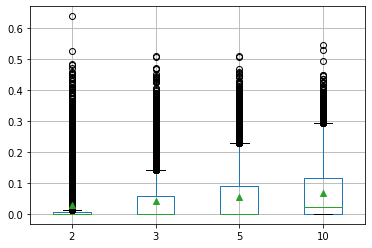

2     0.030019
3     0.042134
5     0.054418
10    0.066776
dtype: float64


In [153]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

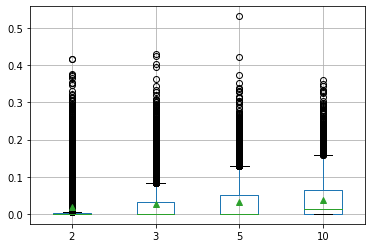

2     0.019627
3     0.026310
5     0.032314
10    0.038421
dtype: float64


In [154]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

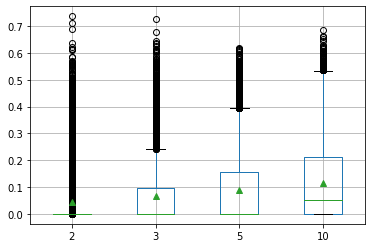

2     0.044666
3     0.065974
5     0.088355
10    0.116817
dtype: float64


In [155]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

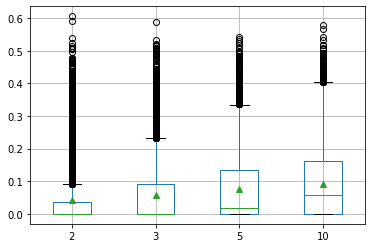

2     0.041514
3     0.056830
5     0.075981
10    0.093155
dtype: float64


In [156]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

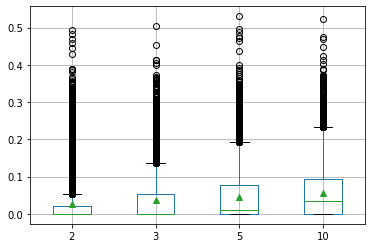

2     0.026207
3     0.036125
5     0.046701
10    0.056340
dtype: float64


In [157]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[0.367]*3, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

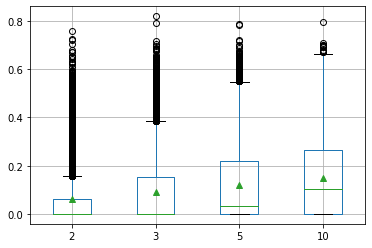

2     0.062540
3     0.089955
5     0.121276
10    0.149040
dtype: float64


In [158]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[-0.367]*3, t=[1,5,1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))